In [3]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv', index_col='PassengerId')

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
print(len(titanic['Age']))
print(len(titanic['Age'].dropna()))
print(titanic['Age'].mean())
print(titanic['Age'].median())
print("Moda: ",titanic['Age'].value_counts().index[0])
print(titanic['Age'].mode())
print("Minimo:", titanic['Age'].min())
print("Massimo:", titanic['Age'].max())
print("Range:", titanic['Age'].max() - titanic['Age'].min())


891
714
29.69911764705882
28.0
Moda:  24.0
0    24.0
dtype: float64
Minimo: 0.42
Massimo: 80.0
Range: 79.58


In [16]:
age_norm_01 = (titanic['Age']-titanic['Age'].min())/(titanic['Age'].max()-titanic['Age'].min())

In [20]:
print(age_norm_01.min(), age_norm_01.max()) #verifichiamo che gli estremi siano 0 e 1

age_norm_11 = (titanic['Age'].max()+titanic['Age'].min()-2*titanic['Age'])/(titanic['Age'].max()-titanic['Age'].min())
print(age_norm_11.min(), age_norm_11.max()) #verifichiamo che gli estremi siano -1 e 1
print("Quantile di ordine 0 (minimo):", titanic['Age'].quantile(0))
print("Quantile di ordine 0.5 (mediana):", titanic['Age'].quantile(0.5))
print("Quantile di ordine 1 (massimo):", titanic['Age'].quantile(1))
print("Quantile di ordine 0.15:", titanic['Age'].quantile(0.15))
print("Percentile di ordine 50% (mediana):", titanic['Age'].quantile(50/100))
print("Percentile di ordine 30%:", titanic['Age'].quantile(30/100))

0.0 1.0
-1.0 1.0
Quantile di ordine 0 (minimo): 0.42
Quantile di ordine 0.5 (mediana): 28.0
Quantile di ordine 1 (massimo): 80.0
Quantile di ordine 0.15: 17.0
Percentile di ordine 50% (mediana): 28.0
Percentile di ordine 30%: 22.0


In [21]:
print("Quartile di ordine 0 (minimo):", titanic['Age'].quantile(0/4))
print("Quartile di ordine 1:", titanic['Age'].quantile(1/4))
print("Quartile di ordine 2 (mediana):", titanic['Age'].quantile(2/4))
print("Quartile di ordine 3:", titanic['Age'].quantile(3/4))
print("Quartile di ordine 4 (massimo):", titanic['Age'].quantile(4/4))

Quartile di ordine 0 (minimo): 0.42
Quartile di ordine 1: 20.125
Quartile di ordine 2 (mediana): 28.0
Quartile di ordine 3: 38.0
Quartile di ordine 4 (massimo): 80.0


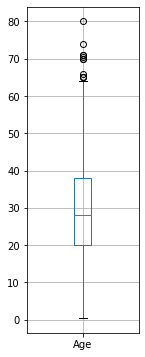

In [22]:
from matplotlib import pyplot as plt
titanic['Age'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

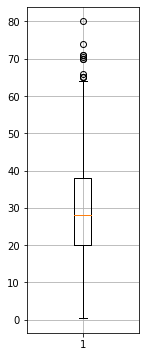

In [23]:
plt.figure(figsize=(2,6))
plt.boxplot(titanic['Age'].dropna()) #inseriamo dropna per eliminare i NaN
plt.grid()
plt.show()

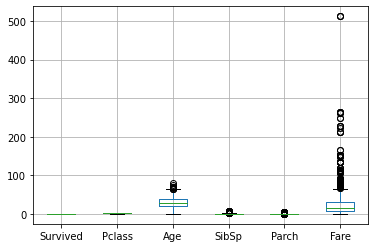

In [24]:
titanic.plot.box()
plt.grid()
plt.show()

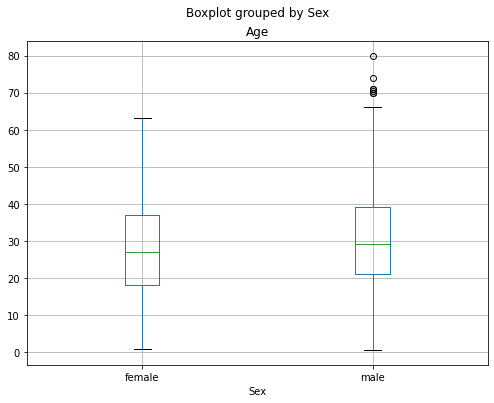

In [25]:
titanic.boxplot(by='Sex',column=['Age'], figsize=(8,6))
plt.show() 

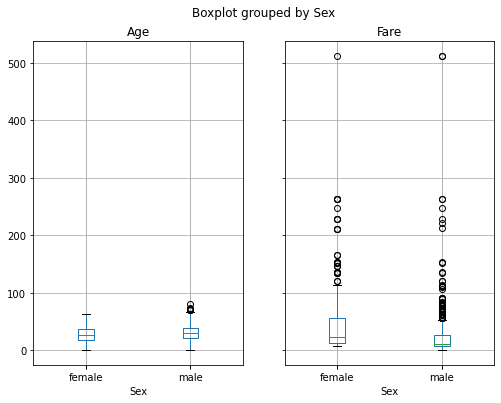

In [26]:
titanic.boxplot(by='Sex',column=['Age','Fare'], figsize=(8,6))
plt.show()

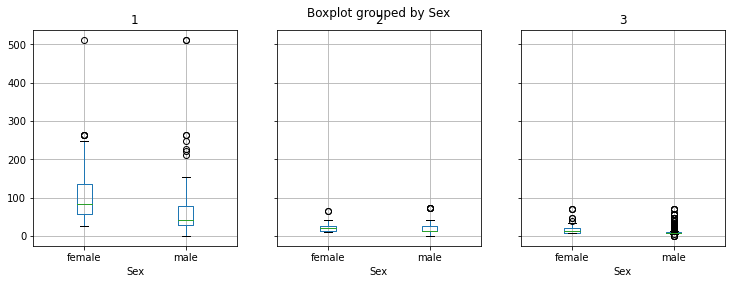

In [27]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Fare'], figsize=(12,4), layout=(1,3))
plt.show()

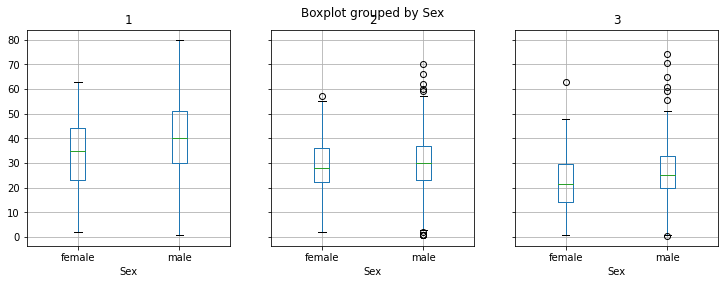

In [28]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Age'], figsize=(12,4), layout=(1,3))
plt.show()

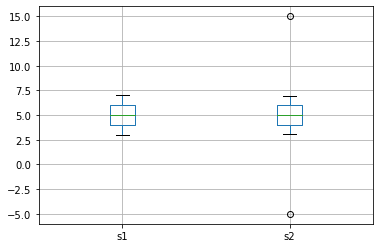

Range sample 1: 4.0
Range sample 2: 20.0


In [30]:
import numpy as np
sample1 = np.linspace(3,7,100)
sample2 = sample1.copy()
sample2[0]=-5 #sostituiamo due valori con gli outliers -5
sample2[-1]=15 # e 15

df = pd.DataFrame({'s1':sample1,'s2':sample2})

df.plot.box()
plt.grid()
plt.show()

print("Range sample 1:",df['s1'].max()-df['s1'].min())
print("Range sample 2:",df['s2'].max()-df['s2'].min())

In [31]:
q11,q13 = df['s1'].quantile([1/4,3/4])
q21,q23 = df['s2'].quantile([1/4,3/4])
print("Lo scarto interquartile di sample 1 è:",q13-q11)
print("Lo scarto interquartile di sample 2 è:",q23-q21)

Lo scarto interquartile di sample 1 è: 2.0
Lo scarto interquartile di sample 2 è: 2.0


In [33]:
print(df['s1'].var())
print(df['s2'].var())
print("Deviazione standard del campione:",titanic['Age'].std(),"anni")

1.3740094548175354
3.313403394211474
Deviazione standard del campione: 14.526497332334044 anni


In [34]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
titanic.groupby('Pclass')['Age'].std()

Pclass
1    14.802856
2    14.001077
3    12.495398
Name: Age, dtype: float64

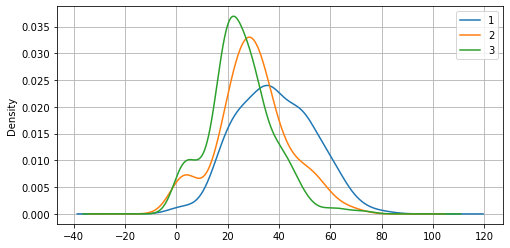

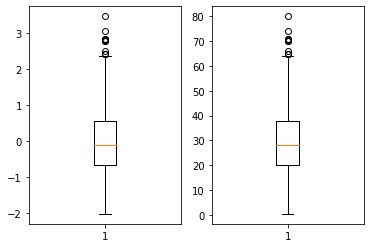

In [38]:
titanic.groupby('Pclass')['Age'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

from scipy.stats import zscore
zscore([0,1,2,3,4])
age_z=zscore(titanic['Age'].dropna())
plt.subplot(1,2,1)
plt.boxplot(age_z) #boxplot normalizzato
plt.subplot(1,2,2)
plt.boxplot(titanic['Age'].dropna()) #boxplot non normalizzato
plt.show()

In [39]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

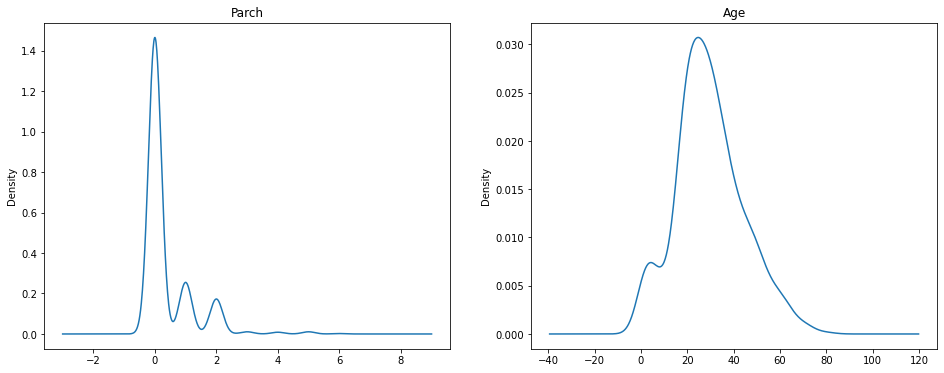

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Parch')
titanic['Parch'].plot.density()
plt.subplot(122)
plt.title('Age')
titanic['Age'].plot.density()
plt.show()

In [41]:
titanic.kurtosis()

Survived    -1.775005
Pclass      -1.280015
Age          0.178274
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64

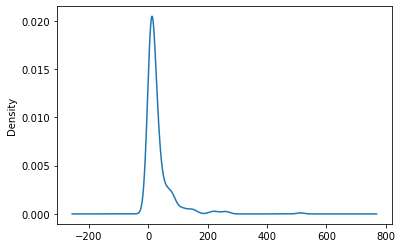

In [42]:
titanic['Fare'].plot.density()
plt.show()

In [43]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
iris['species'].unique()
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


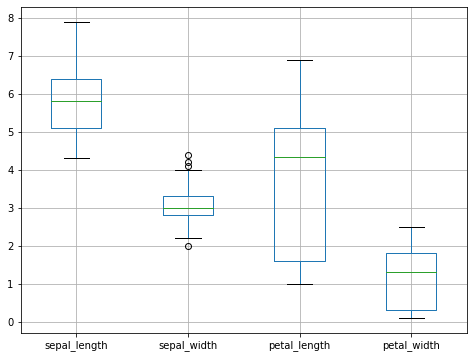

In [46]:
iris.plot.box(figsize=(8,6))
plt.grid()
plt.show()

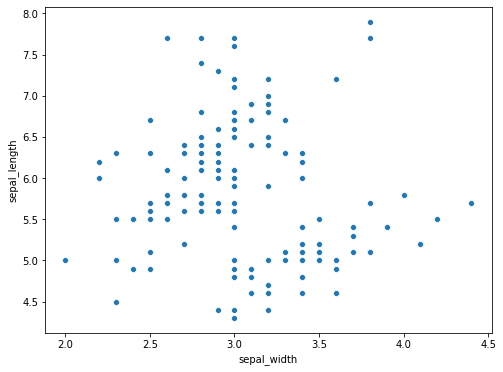

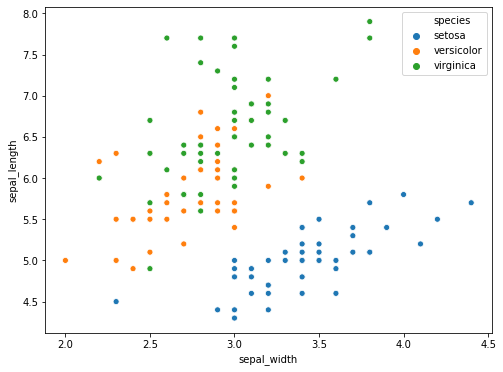

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['sepal_width'], iris['sepal_length'])
plt.show()
plt.figure(figsize=(8,6))
sns.scatterplot(iris['sepal_width'], iris['sepal_length'], hue=iris['species'])
plt.show()

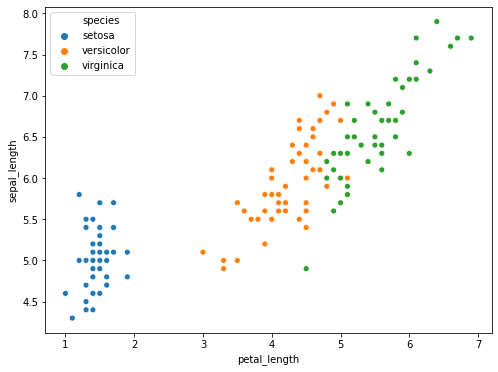

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['petal_length'], iris['sepal_length'], hue=iris['species'])
plt.show()

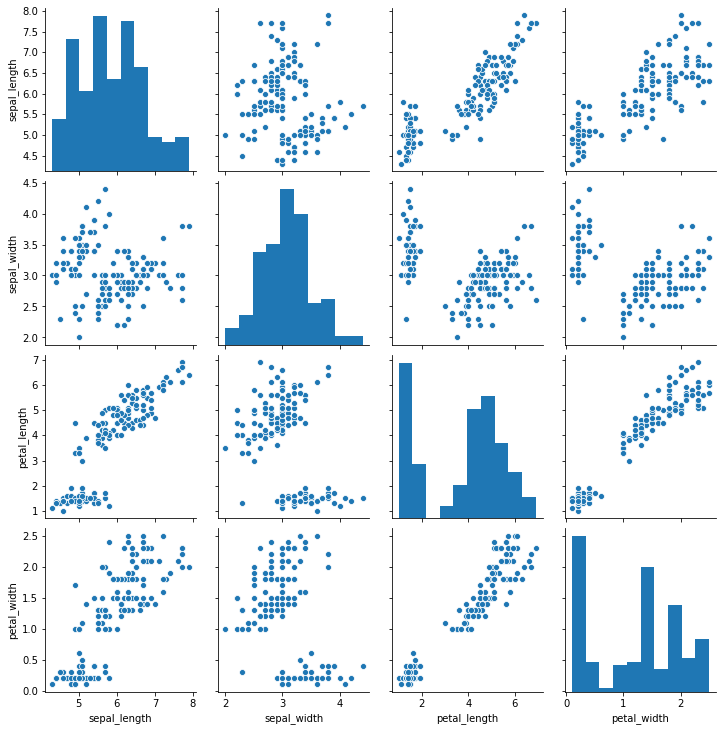

In [50]:
sns.pairplot(iris)
plt.show()

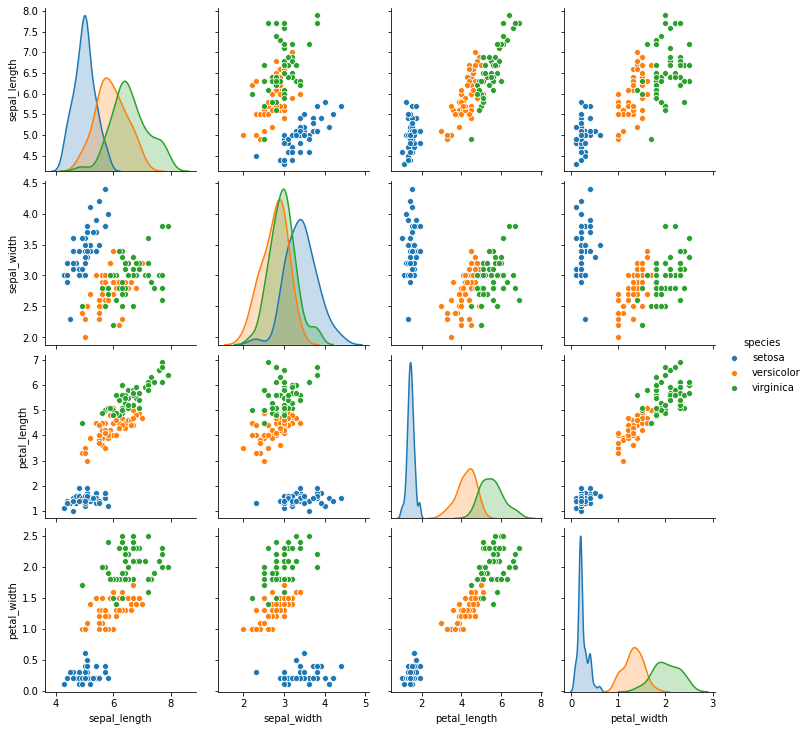

In [51]:
sns.pairplot(iris, hue='species')
plt.show()

In [52]:
print(iris.mean()) 

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


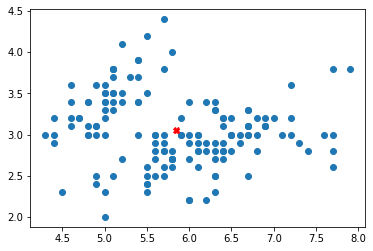

sepal_length    5.843333
sepal_width     3.057333
dtype: float64


In [56]:
iris2d = iris[['sepal_length','sepal_width']]
mean_point = iris2d.mean()
plt.scatter(iris2d['sepal_length'],iris2d['sepal_width'])
plt.plot(mean_point[0], mean_point[1],'rX')
plt.show()
print(mean_point)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

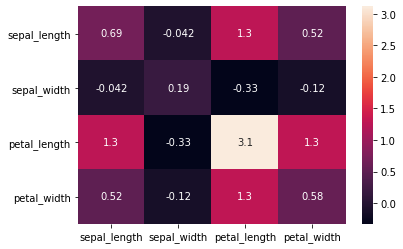

In [60]:
iris.cov()
sns.heatmap(iris.cov(),annot=True)
iris.var()

In [61]:
iris.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

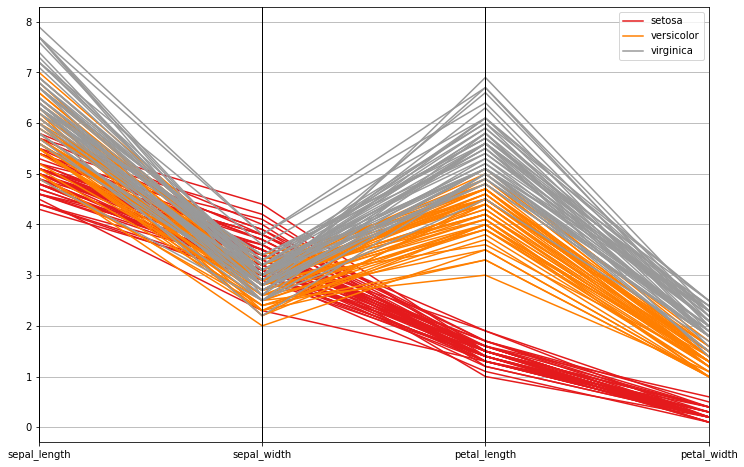

In [62]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,8))
parallel_coordinates(iris, 'species', colormap=plt.get_cmap("Set1"))
plt.show()

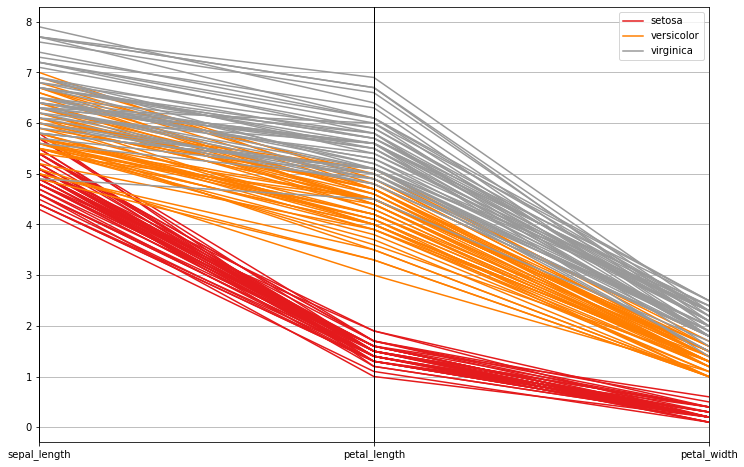

In [63]:
plt.figure(figsize=(12,8))
parallel_coordinates(iris[['sepal_length','petal_length','petal_width','species']], 
                     'species', colormap=plt.get_cmap("Set1"))
plt.show()

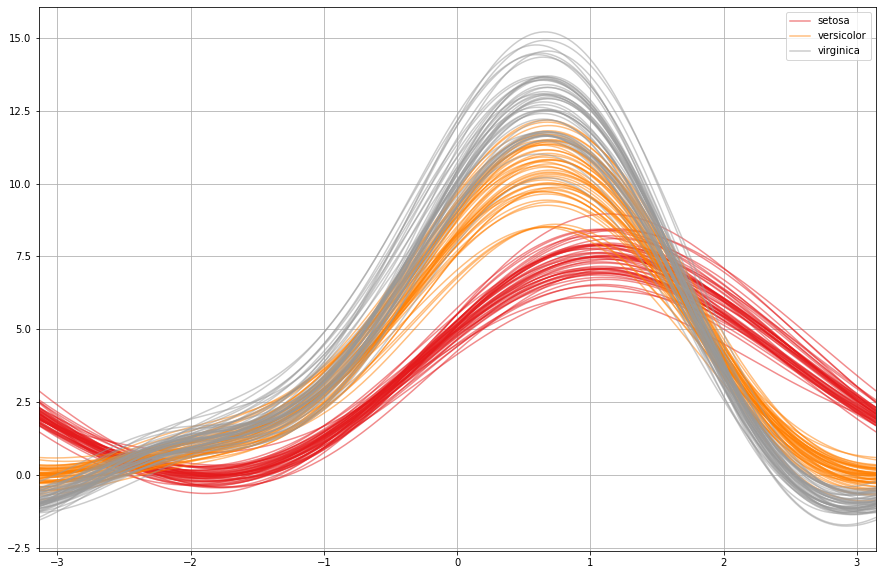

In [64]:
import pandas.plotting as pdplt
plt.figure(figsize=(15,10))
pdplt.andrews_curves(iris, 'species', alpha=0.5, colormap=plt.get_cmap("Set1"))

plt.show()

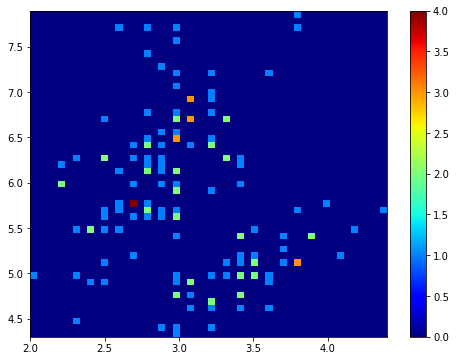

In [65]:
plt.figure(figsize=(8,6))
plt.hist2d(iris['sepal_width'], iris['sepal_length'], (50, 50), cmap=plt.cm.jet)
plt.colorbar()